In [2]:
import numpy as np
from PIL import Image
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [6]:
with open('data/generated_data_bravura/0_bravura-1.svg') as f:
    soup = BeautifulSoup(f, 'xml')

In [7]:
svg_tag = soup.find('svg')
width = float(svg_tag['width'].strip('px'))
height = float(svg_tag['height'].strip('px'))
print(width, height)

2976.38 4209.44


In [8]:
barline = [x for x in soup.find_all('polyline') if x['class'] == 'BarLine'][1]
print(barline)

<polyline class="BarLine" points="2617.16,828.233 2617.16,930.233" stroke="#000000" stroke-linejoin="bevel" stroke-width="4.00"/>


In [9]:
right = float(barline['points'].split(',')[0])
print(right)

2617.16


In [10]:
time_sigs = [x for x in soup.find_all('path') if x['class'] == 'TimeSig']
print(time_sigs[0])

<path class="TimeSig" d="M535.498,830.412 C537.446,830.412 539.105,830.186 540.475,829.733 C541.845,829.28 542.722,829.053 543.108,829.053 C543.566,829.053 543.925,829.183 544.186,829.444 C544.384,829.631 544.514,829.855 544.576,830.116 C544.576,830.251 544.509,830.449 544.373,830.709 L515.967,863.725 L532.654,863.725 L532.654,850.631 C532.654,849.787 532.884,849.069 533.342,848.475 C534.123,847.829 534.774,847.439 535.295,847.303 C536.139,846.918 537.18,846.006 538.42,844.569 C539.462,843.402 540.701,841.355 542.139,838.428 C542.326,838.032 542.618,837.834 543.014,837.834 C543.795,837.834 544.248,838.293 544.373,839.209 L544.373,863.725 L551.514,863.725 C552.42,863.725 552.941,864.209 553.076,865.178 C553.076,866.157 552.555,866.647 551.514,866.647 L544.373,866.647 L544.373,867.428 C544.373,870.032 545.024,872.246 546.326,874.069 C547.826,875.892 549.587,876.803 551.608,876.803 C552.389,876.803 552.779,877.194 552.779,877.975 C552.779,878.756 552.389,879.147 551.608,879.147 C550.243,8

In [11]:
def get_coords(s):
    # s is a string like M425.006,618.084
    # returns a pair of floats (425.006, 618.084)
    x = s.split()
    x = [y.strip('MCL') for y in x]
    x = np.array(list(map(lambda y: list(map(float, y.split(','))), x)))
    return x

all_coords = np.concatenate([get_coords(time_sigs[0]['d']), get_coords(time_sigs[1]['d'])], axis=0)
left = np.max(all_coords[:, 0])
print(left)

553.076


In [12]:
left_frac = left/width
right_frac = right/width

In [64]:
def add_noise(image_np):
    noise = np.random.choice([0, 255], size=image_np.shape, p=[0.99, 0.01])
#     noise = np.random.randn(*image_np.shape)*50
    return np.max(np.array([noise, image_np]), axis=0)

(256, 512)


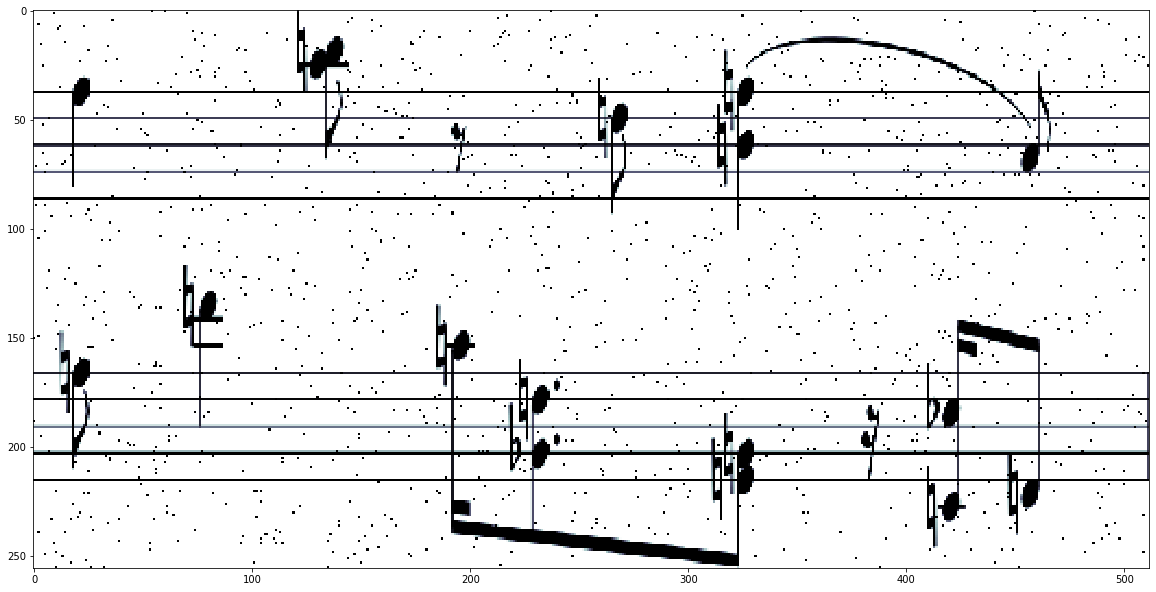

In [65]:
image = Image.open('data/generated_data_bravura/0_bravura-1.png')
im_width, im_height = image.size
image = image.crop((left_frac*im_width, 0, right_frac*im_width, im_height))
image = image.crop(image.getbbox())
image = image.resize((512, 256))
image_np = np.array(image)[:, :, 3]
image_np = add_noise(image_np)
plt.figure(figsize=(20, 40))
plt.imshow(image_np, cmap='bone_r')
print(image_np.shape)

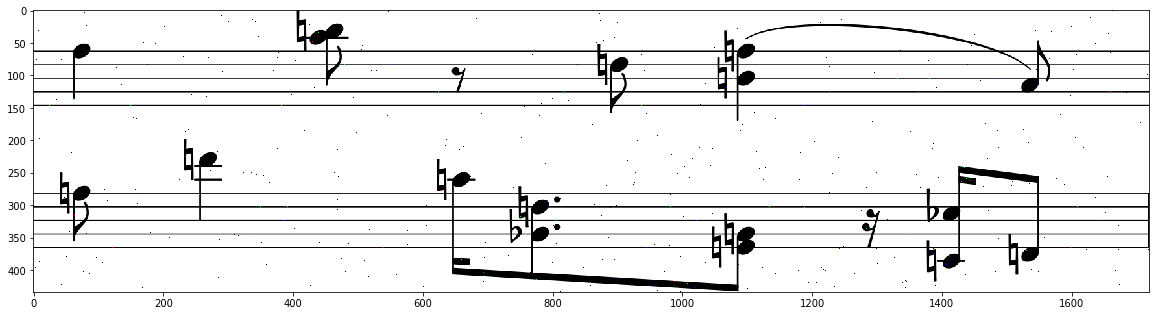

In [38]:
plt.figure(figsize=(20, 40))
plt.imshow(add_noise(image_np), cmap='bone_r')